In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
parent_dir=os.path.split(os.getcwd())[0]
multi=parent_dir+'\\src\\data\\EN\\AutoPhrase_multi-words.txt'
single=parent_dir+'\\src\\data\\EN\\AutoPhrase_single-word.txt'
All=parent_dir+'\\src\\data\\EN\\AutoPhrase.txt'

In [2]:
dblp_qmulti=pd.read_fwf(multi,header=None,names=['quality score','phrase'])
dblp_qmulti['phrase length']=dblp_qmulti['phrase'].apply(lambda x : len(x.split()))
dblp_qmulti=dblp_qmulti[dblp_qmulti['phrase length']>1]
dblp_qsingle=pd.read_fwf(single,header=None,names=['quality score','phrase'])

dblp_qmulti['phrase length'].value_counts()

2    314974
3    242910
4     91226
5     12078
6       719
Name: phrase length, dtype: int64

In [3]:
dblp_all=pd.read_fwf(All,header=None,names=['quality score','phrase'])
dblp_all['phrase length']=dblp_all['phrase'].apply(lambda x : len(str(x).split()))


Text(0.5, 1.0, 'distribution single-words phrase quality score')

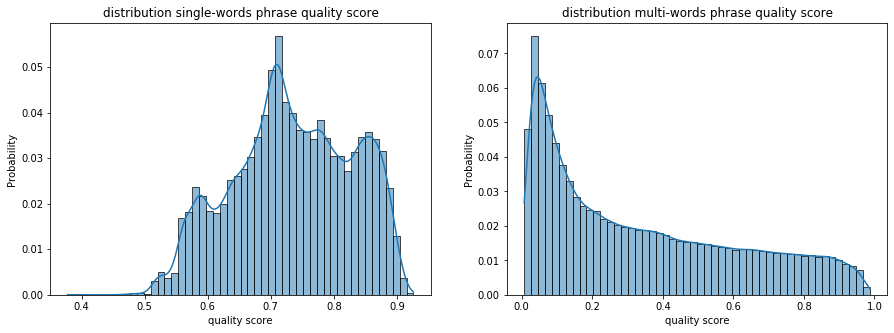

In [4]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.histplot(dblp_qmulti, x="quality score",stat="probability",bins=50,kde=True,ax=axes[1]).set_title('distribution multi-words phrase quality score')
sns.histplot(dblp_qsingle, x="quality score",stat="probability",bins=50,kde=True,ax=axes[0]).set_title('distribution single-words phrase quality score')

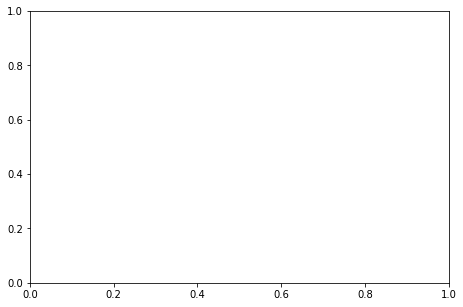

In [49]:
f, ax= plt.subplots(1, 1,figsize=(7.5,5))
sns.boxplot(y="quality score", x="phrase length", data=dblp_all,ax=ax).set_title('boxplot phrase quality score vs phrase length')

Text(0.5, 1, 'boxplot phrase quality score vs phrase length')

In [51]:
f.savefig('boxplot.png')

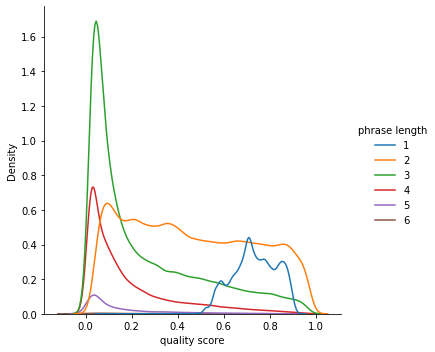

In [59]:
kde=sns.displot(dblp_all, x="quality score",hue='phrase length',kind='kde',palette="tab10")
kde.savefig('kde.png')

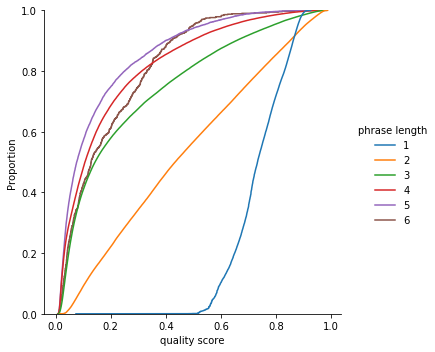

In [60]:
ecdf=sns.displot(dblp_all, x="quality score",hue='phrase length',palette="tab10", kind="ecdf")
ecdf.savefig('ecdf.png')

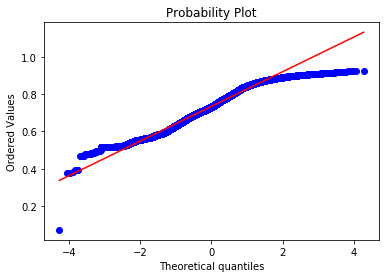

In [16]:
import scipy.stats as stats
import pylab

stats.probplot(dblp_all[dblp_all['phrase length']==1]['quality score'], dist="norm", plot=pylab)

pylab.show()

In [25]:
stats.ks_2samp(dblp_all[dblp_all['phrase length']==4]['quality score'], dblp_all[dblp_all['phrase length']==5]['quality score'])

Ks_2sampResult(statistic=0.09897471185937623, pvalue=2.165133500438586e-91)